<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Green'> Sua 2° Máquina Preditiva com Regressão Logística</font>




#O que é? Quando usamos LR?

![](https://thumbs.gfycat.com/SecondaryDapperCopperbutterfly-size_restricted.gif)

![](https://editor.analyticsvidhya.com/uploads/221055cc7604b063fb0c7d541a527_5cbeb12eae2b883405064bc1_two-choice.jpeg)

A Regressão logística é provavelmente um dos mais interessantes algoritmos de aprendizado de máquina supervisionado em aprendizado de máquina. 

Apesar de ter **“Regressão”** no nome, Regressão Logística é um algoritmo de **classificação** supervisionada.

Ela serve para resolver problemas com resultados binários, como **Sim / Não**,** 0/1**, **Verdadeiro / Falso**, que são chamados de problemas de **classificação**.

**A regressão linear não fornece** uma boa linha de ajuste para os problemas com apenas dois valores. Ela dará menos precisão durante a previsão porque não cobrirá os conjuntos de dados, porque é linear por natureza.

https://www.youtube.com/watch?v=8WOkgNG6Ykk


![](https://pcodinomebzero.neocities.org/Imagens/logistica.png)


Para o melhor ajuste dos conjuntos de dados categóricos, uma **Curva é necessária, sendo possível fazer essa parada com a ajuda da Regressão Logística,** pois usa uma função Sigmóide para fazer previsões.



![](https://editor.analyticsvidhya.com/uploads/60550sigmoid-equation.png)

![](https://editor.analyticsvidhya.com/uploads/281361_a04iKNbchayCAJ7-0QlesA.png)

![](https://andferrari.github.io/post/sigmoid/sigmoid_fit.gif)

Ele **define um valor de ponto de corte(cut)**, que **geralmente é definido como 0,5**, que, ao ser excedido pela saída prevista da curva logística, dá a respectiva saída prevista na forma de qual categoria o conjunto de dados pertence

Por exemplo,

No caso do **Modelo de previsão de Default**, **se a saída exceder o ponto de corte, a saída de previsão será dada como Sim para possível Default do cliente**, caso contrário, Não, se o valor estiver abaixo do ponto de corte.

#Como fazer essa parada em Python?

### Importação dos Pacotes

In [1]:
# Import dos módulos
import pandas as pd
import seaborn as sns
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Conhecendo os Dados

In [3]:
# Carregando os dados
arquivo = 'default.csv'
colunas = ['Escore_Serasa', 'Escore_CCF', 'Atraso_30D', 'Saldo_cc_ULT_3M', 
           'Proventos/Endiv', 'Endiv_SFN', 'Expos_CHESP', 'Expos_CRD', 'Default']
dados = read_csv(arquivo, names = colunas)
array = dados.values
 

In [5]:
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

### Avaliando a Variável Target

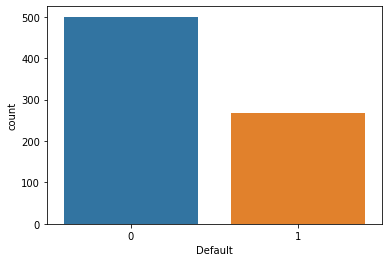

In [6]:
# Look at breakdown of label
dados['Default'].value_counts()
sns.countplot(dados['Default'])

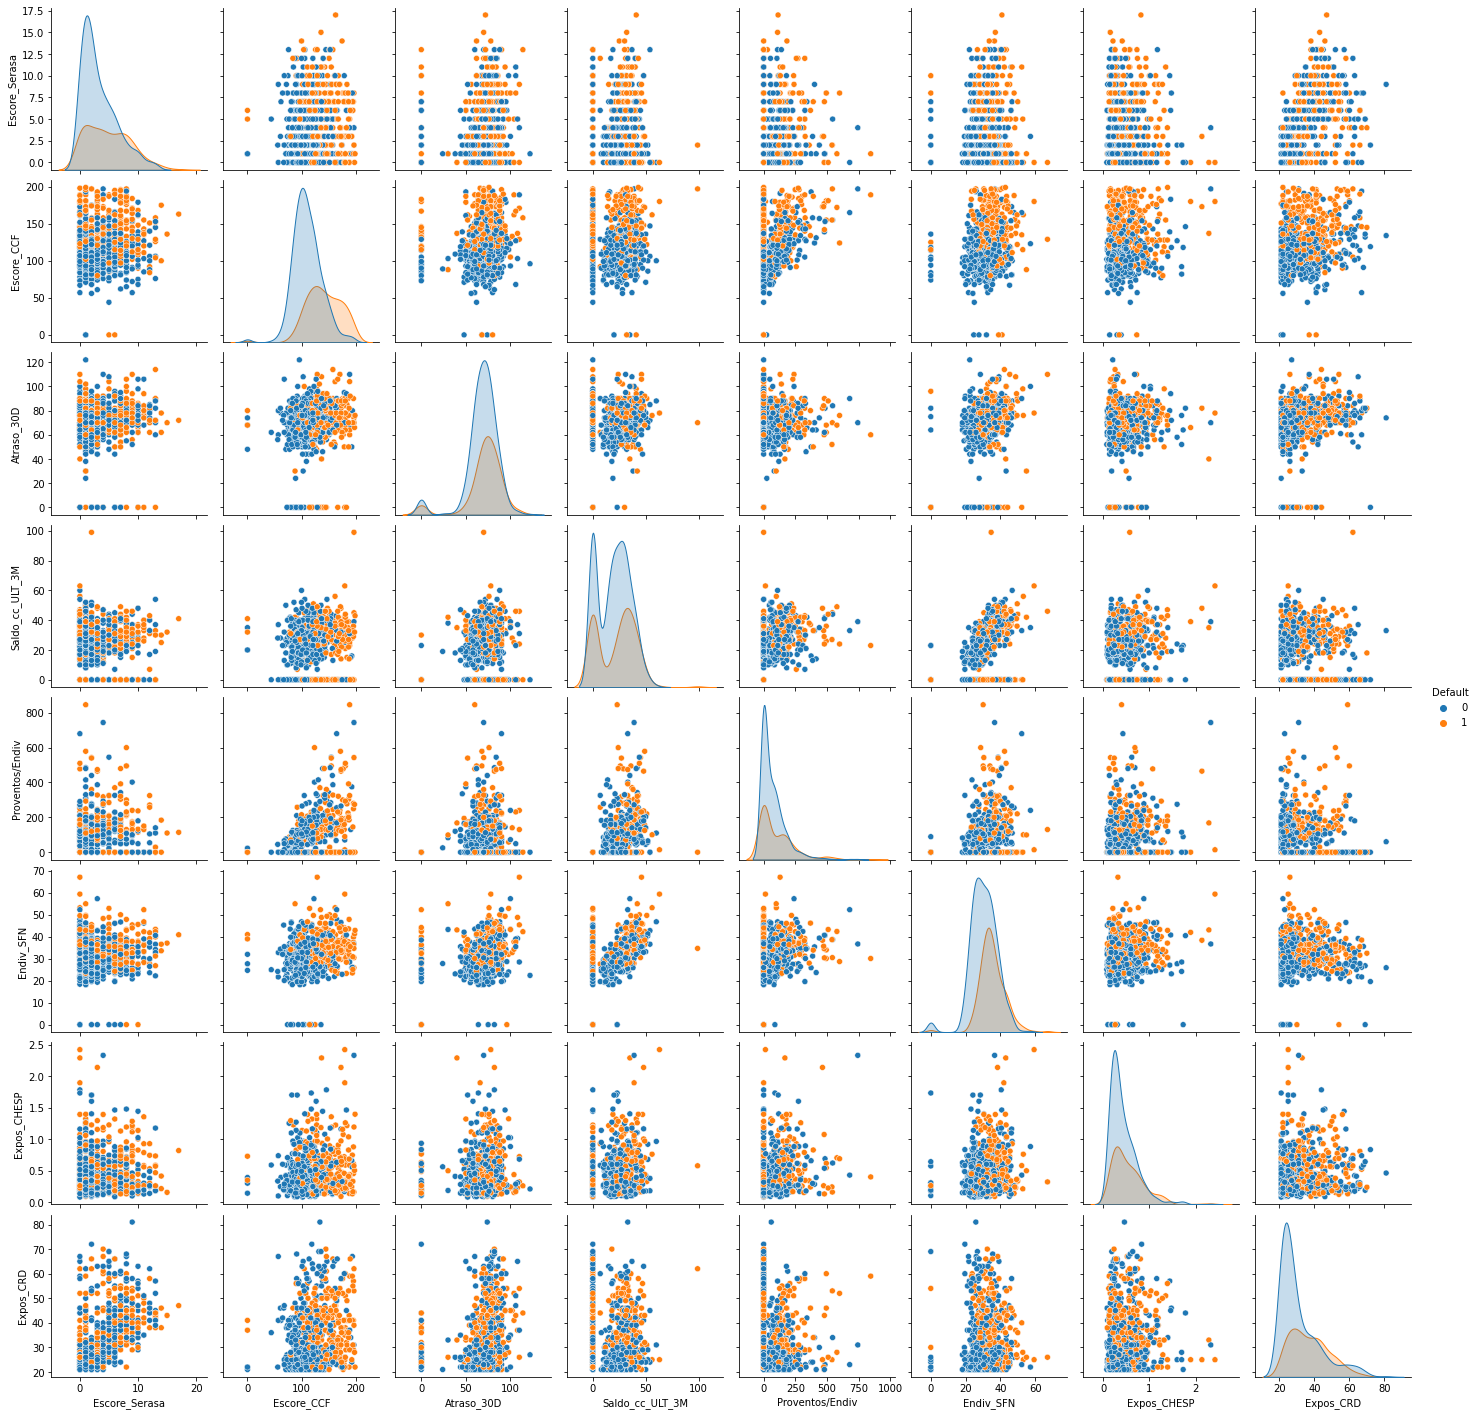

In [8]:

# Explore data visually with multple scatter plots
sns.pairplot(dados, hue='Default')

### Análise da Distribuição das Variáveis

In [ ]:
dados.describe()

,Escore_Serasa,Escore_CCF,Atraso_30D,Saldo_cc_ULT_3M,Proventos/Endiv,Endiv_SFN,Expos_CHESP,Expos_CRD,Default
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Amostragem dos dados 

In [9]:
# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]
 
# Definindo o tamanho das amostras
teste_size = 0.3
 
# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7
 
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)


### Criando Máquina Preditiva com a Logística

In [10]:
# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)
 
# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 74.892%


In [11]:
# Apply model to validation data
y_predict = modelo.predict(X_teste)

### Avaliando a Máquina

In [12]:
# Evaluate model
print('Classification metrics: \n', classification_report(Y_teste, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       147
         1.0       0.70      0.55      0.61        84

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



#### Confusion Matrix

In [13]:
# Evaluate model
print('Confusion Matrix: \n', confusion_matrix(Y_teste, y_predict))

Confusion Matrix: 
 [[127  20]
 [ 38  46]]


#### Novas Previsões

In [14]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual: ': Y_teste,
                     'Prediction: ': y_predict})
actual_vs_predict.head(20)

,Actual:,Prediction:
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0
5,1.0,0.0
6,0.0,0.0
7,1.0,0.0
8,0.0,1.0
9,0.0,0.0


### Aplicações Práticas

#**Resumão**




![](https://miro.medium.com/max/1384/1*6J_DQP9BIdHo72VVr4Y1gQ.gif)







